# Predicción lineal

 En la figura se observa un filtro forward predictor con una estructura FIR

<img src="predictor.png" alt="Predictor lineal"/>

Las entradas a los taps son $u(i-1), u(i-2), ..., u(i-M)$. La idea de este filtro es predecir el valor siguiente de la señal $u(i)$, denotado $\hat{u}(i)$.

El objetivo es encontrar el vector de taps *${\hat{w}}$* que minimice la suma cuadrática de los errores de predicción, $e_f$

$$e_f = \sum_{i=M+1}^{N} \left|f_M(i)\right|^2$$

#### Encontrar:

1. La matriz de $M$ por $M$ de correlación los taps de entrada 

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$ 

3. El valor mínimo de $e_f$

4. El vector de taps *${\hat{w}}$*

5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### Consejos orientativos:
* Pensar a $N$ como un valor mayor a $M$. Es decir, $N$ representa la cantidad TOTAL de puntos de $u(i)$ y $M$ es la cantidad de taps del filtro. En un momento dado, hay $M$ puntos de $u(i)$ dentro del filtro.
* Podemos pensar que el primer valor válido de $u$ es $u(1)$, es decir la secuencia empieza $u(1), u(2), \dots ,u(N)$
* El filtro produce resultados desde $i = M+1$ hasta $i = N$, es decir, $N-M$ predicciones.
* Al ser las señales reales, los valores hermíticos de los vectores o matrices son los traspuestos.
* Para multiplicación de matrices, utilizar @. Por ejemplo:

In [ ]:
import numpy as np
a = np.array([[1,2,3],[2,3,1]])
b = np.array([-1,4,3])
c = a @ b
c

## Respuestas

# R1. 
La matriz de MxM de autocorrelacion de los taps de entrada es; 


<img src="matriz_correlacion2.png" alt="matriz correlacion" width=500/>

donde $\phi(t,k)$ son los coeficientes de autocorrelacion segun:

<img src="fi.png" alt="fi" width=200/>

pero por convenientica matematica se define una matriz A hermitica, tal que:

### OJO que esta matriz tiene una columna extra!!


<img src="a_hermitica.png" alt="a_hermitica" width=400/>

y se implementa con el siguiente codigo:

In [ ]:
# genera la matriz A hermitica basada en el vector de entrada Nx1 y el numero de coeficientes M
# elegido. resultando en una matriz de M filas y N (N-M) columnas              
    def generateAHermitica(self,u,M):                                                             
        col=u.size-M                                                                              
        aH=np.zeros((M,col))                                                                      
        for i in range(M):                                                                        
            aH[i]=u[M-i:M-i+col]                                                               
        return aH 

entonces $\phi$ sera:

<img src="fi_a_hermitica.png" alt="fi_a_hermitica" width=150/>

y se implementa con el siguiente codigo:

In [ ]:
#simplemente calcula la matriz hermitica de otra matriz, para hacer mas legible el codigo y
#reutilizar la funcion repetidamente, si entra MxN sale NxM                      
def calcHermitica(self,aH):                                                      
    return aH.transpose().conjugate()                                            
                                                                                 
#calcula la matriz phi de autocorrelacion, basado en la matriz hermitica, es un calculo simple
# pero de nuevo se lo define como funcion por modularidad, el resultado sera una matriz de MxM
def phi(self,aH):                                                                
    return aH@self.calcHermitica(aH) 

# R2.
Luego el vector Z de correlacion cruzada entre los taps de entrada del predictor y la respuesta deseada sera:

<img src="z.png" alt="z" width=350/>
<img src="z2.png" alt="z2" width=150/>

y se implementa con el siguiente codigo:

In [ ]:
#calcula el vector correlacion cruzada z, que es simplemente A hermitica por el vector d. el
#resultado sera de dimension Mx1                                                 
def z(self,aH,d):                                                                
    return aH@d 

# R3.
El valor minimo e, como el minimo error cuadratico medio entre la senial obtenida y la deseada sera:


<img src="e.png" alt="e" width=350/>

y se implementa con el siguiente codigo:

In [ ]:
#calcula e (1x1) que es el error cuadratico medio entre el vector deseado y lo obtenido a
#la salida del filtro                                                            
def e(self,aH,d):                                                                
    return self.calcHermitica(d)@d - self.w(aH,d)@self.z(aH,d)                   
                                                                 

# R4.
El vector de taps del filtro se calcula mediante:


<img src="w.png" alt="w" width=350/>

y se implementa con el siguiente codigo:

In [ ]:
#calcula el vector w que seran los parametros del filtro Mx1                     
def w(self,aH,d):                                                                
    return np.linalg.inv(self.phi(aH))@self.z(aH,d)

# R5 y R6.
experimentacion:

SENOIDAL


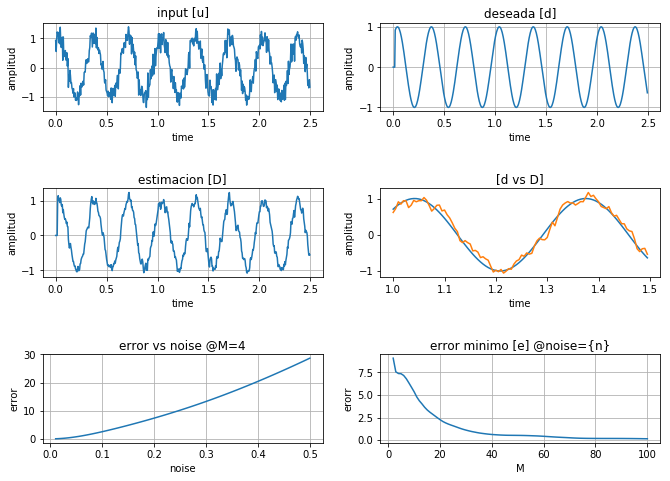

SENOIDAL @M=40


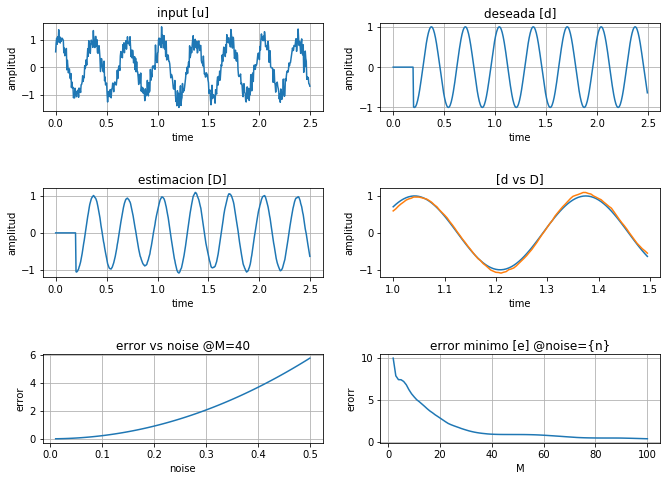

TRIANGULAR


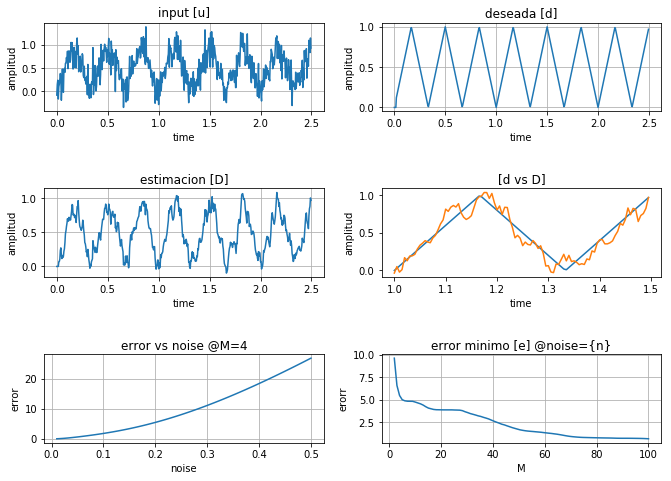

CUADRADA


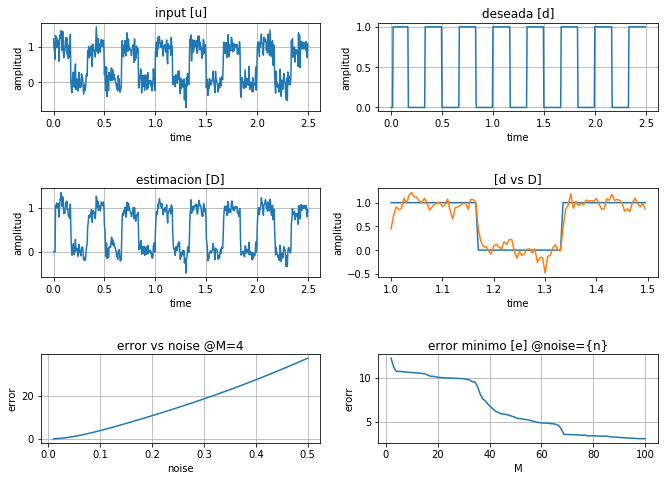

In [3]:
import  matplotlib.pyplot as plt                                                 
import  numpy as np                                                              
from    plotter import *                                                         
from    signal_generator import *                                                
from    wiener import *                                                          
                                                                                 
sg     = signal_generator_class ( )                                              
wiener = wiener_class           ( )                                              
                                                                                 
f0       = 3                                                                     
fs       = 200                                                                   
N        = 500                                                                   
A        = 1                                                                     
#numero de coeficientes pedido en el TP                                          
M        = 4                                                                     
#estos dos parametros son para hacer una corrida con varios M y comparar el error
Mmin     = 2                                                                     
Mmax     = 100                                                                   
#se sube el ruido de 0.02 pedido en el tp para que se aprecie mejor en las curvas el funcionamiento del filtro
n        = 0.2                                                                   
#estos dos parametros son para definir una cota max y min del ruido sumado a la senial y probar
#dentro de ese rango el error obtenido                                           
noiseMin = 0.01                                                                  
noiseMax = 0.5                                                                   
                                                                                 
#agrupo las poeraciones comunes para repetir la experiencias con distintas seniales
def run(u,U):                                                                    
    #hago un barrdo ,manteniendo fijo el error en u, pero cambiando la cantidad de coeficientes para
    #ver como baja el error a medida que el filtro crece                         
    eM=np.zeros(Mmax-Mmin)                                                       
    for i in range(Mmin,Mmax):                                                   
        d             = U[i:]                                                  
        DD,eM[i-Mmin] = wiener.filter(u,d,t,i)                                   
    teM=np.linspace(Mmin,Mmax,Mmax-Mmin)                                         
                                                                                 
    #ahora mantengo fijo el M, y modifico el error en la senial para ver como aumenta el error a
    #medida que la senial se deteriora                                           
    eNoise=[]                                                                    
    varNoise=np.linspace(noiseMin,noiseMax,100)                                  
    for i in varNoise:                                                           
        d    = U[M:]                                                           
        DD,e = wiener.filter(U+i*noise,d,t,M)                                    
        eNoise.append(e)                                                         
                                                                                 
    #la senial deseada la tomo M posiciones a posteriori de la original ya que el filtro tarda M taps en predecir
    d   = U[M:]                                                                
    #ejecuto el filtro y guardo el vector estimado D y tambien el error          
    D,e = wiener.filter ( u,d,t,M  )                                             
    #agrego ceros en la primera arte del vector estimado y del deseado para que sean
    #coincidentes con el vector original de entrada y tambien para que tengan la misma longitud
    #que t y se pueda visualizar todo sobre la misma escala temporal             
    D   = np.pad ( D,(M,0 ),'constant')                                        
    d   = np.pad ( d,(M,0 ),'constant')                                        
    #dibujo las curvas                                                           
    pl  = plotter_class ( 3,2 )                                                  
    pl.plot_signal ( 1 ,t        ,u      ,'input [u]'                   ,'time'  ,'amplitud' ,trace='-'                         )
    pl.plot_signal ( 2 ,t        ,d      ,'deseada [d]'                 ,'time'  ,'amplitud' ,trace='-'                         )
    pl.plot_signal ( 3 ,t        ,D      ,'estimacion [D]'              ,'time'  ,'amplitud' ,trace='-'                         )
    pl.plot_signal ( 4 ,t        ,d      ,'deseada [d]'                 ,'time'  ,'amplitud' ,trace='-',center = N/2 ,zoom=N/10 )
    pl.plot_signal ( 4 ,t        ,D      ,'[d vs D]'                    ,'time'  ,'amplitud' ,trace='-',center = N/2 ,zoom=N/10 )
    pl.plot_signal ( 5 ,varNoise ,eNoise ,f'error vs noise @M={M}'      ,'noise' ,'error'    ,trace='-'                         )
    pl.plot_signal ( 6 ,teM      ,eM     ,'error minimo [e] @noise={n}' ,'M'     ,'erorr'    ,trace='-'                         )
    pl.plot_show()                                                               
                                                                                 
# experimentos                                                                   
                                                                                 
#senoidal original solicitada en el TP   
print("SENOIDAL")
u ,t  = sg.signal_sin    ( fs ,f0 ,A ,N   ,np.pi/4 )                             
noise = np.random.normal ( 0,1,u.size              )                             
U     = u                                                                        
u     = u+n*noise                                                                
run(u,U)                                                                         
         
#senoidal con mas coeficientes
print("SENOIDAL @M=40")
u ,t  = sg.signal_sin    ( fs ,f0 ,A ,N   ,np.pi/4 )                             
noise = np.random.normal ( 0,1,u.size              )                             
U     = u                                                                        
u     = u+n*noise             
M=40
run(u,U)       
M=4

# triangular   
print("TRIANGULAR")
u ,t  = sg.signal_triangular ( fs ,f0 ,A ,N   ,50 )                              
noise = np.random.normal     ( 0,1,u.size         )                              
U     = u                                                                        
u     = u+n*noise                                                                
run(u,U)                                                                         
                                                                                 
#cuadrada 
print("CUADRADA")
u ,t  = sg.signal_quad   ( fs ,f0  ,A ,N ,50 )                                   
noise = np.random.normal ( 0,1,u.size        )                                   
U     = u                                                                        
u     = u+n*noise                                                                
run(u,U)                                         

# Conclusion.
 Se implementaron las ecuaciones del filtro Wiener y se agruparon en una clase para su uso generico.
 Se realizaron experimentos con varias seniales ademas de la original solicitada en el TP para ver los resultados.
 Se realizaron corridas manteniendo fijo el error de la senial pero aumentando el numero de coeficientes M y se puede ver en las curvas la tendencia de la disminucion del error a medida que M aumenta, permitiendo hacer una seleccion optima en funcion de la aplicacion
 Por otra parte se realizaron corridas de simulacion manteniendo fijo el M en 4, pero aumentando el riudo aducionado a la senial en cada corrida y se puede ver tambien en las curvas como el error aumenta a medid que el error en la senial aumenta.
     

# Apendice
Se implemnetaron clases para el filtro wiener, ploteo y generacion de seniales para simplificar y modularizar la implementacion. Se dejan a continuacion una copia de ellas, pero ademas su codigo se entrega adjunto como parte del trabajo


### wiener_class
clase para la aplicacino del filtro wiener


In [5]:
import numpy as np                                                                             
                                                                                               
class wiener_class:                                                                            
                                                                                               
    def __init__(self):                                                                        
        return                                                                                 
# genera la matriz A hermitica basada en el vector de entrada Nx1 y el numero de coeficientes M
# elegido. resultando en una matriz de M filas y N (N-M) columnas                              
    def generateAHermitica(self,u,M):                                                          
        col=u.size-M                                                                           
        aH=np.zeros((M,col))                                                                   
        for i in range(M):                                                                     
            aH[i]=u[M-i:M-i+col]                                                               
        return aH                                                                              
                                                                                               
#simplemente calcula la matriz hermitica de otra matriz, para hacer mas legible el codigo y   
#reutilizar la funcion repetidamente, si entra MxN sale NxM                                    
    def calcHermitica(self,aH):                                                                
        return aH.transpose().conjugate()                                                      
                                                                                               
#calcula la matriz phi de autocorrelacion, basado en la matriz hermitica, es un calculo simple 
# pero de nuevo se lo define como funcion por modularidad, el resultado sera una matriz de MxM 
    def phi(self,aH):                                                                          
        return aH@self.calcHermitica(aH)                                                       
                                                                                               
#calcula el vector correlacion cruzada z, que es simplemente A hermitica por el vector d. el   
#resultado sera de dimension Mx1                                                               
    def z(self,aH,d):                                                                          
        return aH@d                                                                            
                                                                                               
#calcula el vector w que seran los parametros del filtro Mx1                                   
    def w(self,aH,d):                                                                          
        return np.linalg.inv(self.phi(aH))@self.z(aH,d)                                        
                                                                                               
#calcula e (1x1) que es el error cuadratico medio entre el vector deseado y lo obtenido a      
#la salida del filtro                                                                          
    def e(self,aH,d):                                                                          
        return self.calcHermitica(d)@d - self.w(aH,d)@self.z(aH,d)                             
                                                                                               
#calcula la estimacion del filtro Mx1                                                          
    def D(self,aH,w):                                                                          
        return self.calcHermitica(aH)@w                                                        
                                                                                               
#defino una funcion que usando todas las anteriores realiza el filtrado y devuelve la          
#estimacion y el error                                                                         
    def filter(self,u,d,t,M):                                                                  
        ah  = self.generateAHermitica ( u  ,M )                                                
        phi = self.phi                ( ah    )                                                
        z   = self.z                  ( ah ,d )                                                
        w   = self.w                  ( ah ,d )                                                
        D   = self.D                  ( ah ,w )                                                
        e   = self.e                  ( ah ,d )                                                
        return D,e                                                     


### plotter_class
clase para la visualizacion de datos


In [1]:
import numpy as np                                                               
import matplotlib.pyplot as plt                                                  
from matplotlib import patches                                                   
from matplotlib.figure import Figure                                             
from matplotlib import rcParams                                                  
                                                                                 
class plotter_class:                                                             
                                                                                 
    def __init__(self,row,col):                                                  
        self.row=row                                                             
        self.col=col                                                             
        self.fig=plt.figure(figsize=( 10, 7))                                    
        self.ax1=self.fig.add_subplot(row,col,1)                                 
        plt.tight_layout(pad=4, w_pad=5, h_pad=6)                                
        plt.draw()                                                               
                                                                                 
    def plot_signal(self, pos, x, y, title, xLabel, yLabel, about='',trace='.',center=0,zoom=0):
        ax=self.fig.add_subplot(self.row,self.col,pos)                           
        N      = len(x)                                                          
        zoom   = int(zoom)                                                       
        center = int(center)                                                     
        if zoom!=0:                                                              
            zoom_min=center-zoom                                                 
            if zoom_min<0:                                                       
                zoom_min=0                                                       
            zoom_max=center+zoom                                                 
            if zoom_max>N:                                                       
                zoom_max=N                                                       
        else:                                                                    
            zoom_max=N                                                           
            zoom_min=0                                                           
        line, =ax.plot(x[zoom_min:zoom_max],y[zoom_min:zoom_max],trace, label=about)
                                                                                 
        ax.set_title(title)                                                      
        ax.set_xlabel(xLabel)                                                    
        ax.set_ylabel(yLabel)                                                    
        ax.grid(which='both', axis='both')                                       
        if about != '':                                                          
            ax.legend(loc='best')                                                
        plt.draw()                                                               
                                                                                 
    def stem_signal(self, pos, x, y, title, xLabel, yLabel, about='',trace='.',center=0,zoom=0):
        ax=self.fig.add_subplot(self.row,self.col,pos)                           
        N      = len(x)                                                          
        zoom   = int(zoom)                                                       
        center = int(center)                                                     
        if zoom!=0:                                                              
            zoom_min=center-zoom                                                 
            if zoom_min<0:                                                       
                zoom_min=0                                                       
            zoom_max=center+zoom                                                 
            if zoom_max>N:                                                       
                zoom_max=N                                                       
        else:                                                                    
            zoom_max=N                                                           
            zoom_min=0                                                           
        line, =ax.plot(x[zoom_min:zoom_max],y[zoom_min:zoom_max],trace, label=about)
        ax.set_title(title)                                                      
        ax.set_xlabel(xLabel)                                                    
        ax.set_ylabel(yLabel)                                                    
        ax.grid(which='both', axis='both')                                       
        if about != '':                                                          
            ax.legend(loc='best')                                                
        plt.stem(x[zoom_min:zoom_max],y[zoom_min:zoom_max])                      
        plt.draw()                                                               
                                                                                 
    def plot_show(self):                                                         
        plt.show()                                                               
                                                                                 
    def plot_draw(self,pause):                                                   
        plt.draw()                                                               
        plt.pause(pause)                                                         
                                                                                 
    def plot_close(self):                                                        
        plt.close()                                                              
                                                                                 
    def zplane(self,b,a,pos):                                                    
        """Plot the complex z-plane given a transfer function.                   
        """                                                                      
                                                                                 
        # get a figure/plot                                                      
        #ax = plt.subplot(111)                                                   
        ax=self.fig.add_subplot(self.row,self.col,pos)                           
                                                                                 
        # create the unit circle                                                 
        uc = patches.Circle((0,0), radius=1, fill=False,                         
                color='black', ls='dashed')                                      
        ax.add_patch(uc)                                                         
                                                                                 
        # The coefficients are less than 1, normalize the coeficients            
        if np.max(b) > 1:                                                        
            kn = np.max(b)                                                       
            b = b/float(kn)                                                      
        else:                                                                    
            kn = 1                                                               
                                                                                 
        if np.max(a) > 1:                                                        
            kd = np.max(a)                                                       
            a = a/float(kd)                                                      
        else:                                                                    
            kd = 1                                                               
                                                                                 
        # Get the poles and zeros                                                
        p = np.roots(a)                                                          
        z = np.roots(b)                                                          
        k = kn/float(kd)                                                         
                                                                                 
        # Plot the zeros and set marker properties                           
        t1 = plt.plot(z.real, z.imag, 'go', ms=10)                               
        plt.setp( t1, markersize=10.0, markeredgewidth=1.0,                      
                markeredgecolor='k', markerfacecolor='g')                        
                                                                                 
        # Plot the poles and set marker properties                               
        t2 = plt.plot(p.real, p.imag, 'rx', ms=10)                               
        plt.setp( t2, markersize=12.0, markeredgewidth=3.0,                      
                markeredgecolor='r', markerfacecolor='r')                        
                                                                                 
        ax.spines['left'].set_position('center')                                 
        ax.spines['bottom'].set_position('center')                               
        ax.spines['right'].set_visible(False)                                    
        ax.spines['top'].set_visible(False)                                      
                                                                                 
        # set the ticks                                                          
        r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])                    
        ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)           
        float_formatter2 = lambda x: f"{x:.2f}"                                  
        np.set_printoptions(formatter={'float_kind':float_formatter2})           
                                                                                 
                                                                       
        ax.set_title(f"polos={p}  \nZreal={z.real}\nZima={z.imag}")              
                                                                                 
        return z, p, k                                                           
   

### signal_generator_class
clase para la generacion de seniales sampleadas


In [ ]:
import numpy as np                                                               
                                                                                 
class signal_generator_class:                                                    
    def __init__(self):                                                          
        pass                                                                     
                                                                                 
    # funcion que recibe: fs frecuencia de sampleo, fo es la frec que quiero     
    # para la senusoide A es la amplitud N el numero de muestras as tomar sim,   
    # punto de simetria (conde esta el vertice                                   
    def signal_triangular(self, fs, fo, A, N , sim):                             
        #inicializo para todos los samples que voy a tener                       
        tt = np.linspace(0, (N-1)/fs, N)                                         
        ans=np.zeros(N)                                                          
        for i in range(N):                                                       
            #calculo el porcentaje actual en funcion de i, y usando modulo para  
            #ir repitiendo cuando llego a la fo                                  
            percent=(tt[i]%(1/fo))/(1/fo) * 100                                  
            #si me paso de lo pedido...                                          
            if percent < sim:                                                    
                ans[i]=A/sim * percent                                           
            else:                                                                
                ans[i]=A-(A/(100-sim) * (percent-sim))                           
        return ans, tt                                                           
                                                                                 
                                                                                 
    # funcion que recibe: fs frecuencia de sampleo, fo es la frec que quiero     
    # para la senusoide A es la amplitud N el numero de muestras as tomar        
    # cilco,  PWM en porcentaje                                                  
    def signal_quad(self, fs, fo, A, N , ciclo):                                 
        #vector de N elementos, y aprovecho a cargarle la Amplitud negativa      
        tt = np.linspace(0, (N-1)/fs, N)                                         
        ans=np.zeros(N)                                                          
        for i in range(N):                                                       
        #    #calculo para cada muestra en que parte del PWM estoy               
            percent=(tt[i]%(1/fo))/(1/fo) * 100                                  
            #si me paso de lo pedido...pongo el valor positivo.                  
            if percent < ciclo:                                                  
                ans[i]=A                                                         
        return ans, tt                                                           
                                                                                 
    # funcion que recibe: fs frecuencia de sampleo, fo es la frec que quiero     
    # para la senusoide A es la amplitud N el numero de muestras as tomar fase,  
    # la fase en radianes                                                        
    def signal_sin(self, fs, fo, A, N , rad=0):                                  
        #con esta magia greo un vector con N valores del seno de fo capturados   
        #una distancia de 1/fs cada uno. Aplico %1 para que no arrastre error de pi a medida
        #que el factor multiplicativo se hace mas grande.. como es periodica en 2*pi aprovecho eso
        tt = np.linspace(0, (N-1)/fs, N)                                         
        ans =  A * np.sin( 2 * np.pi * fo * tt + rad)                            
        return ans, tt                                                           
                                                                                 
    def signal_sin_zero_padded(self, fs, fo, A, N , rad=0,Zeros=0):              
        #con esta magia greo un vector con N valores del seno de fo capturados   
        #una distancia de 1/fs cada uno. Aplico %1 para que no arrastre error de pi a medida
        #que el factor multiplicativo se hace mas grande.. como es periodica en 2*pi aprovecho eso
        tt  = np.linspace(0, (N+Zeros-1)/fs, N+Zeros)                            
        ans = np.linspace(0, (N+Zeros-1)/fs, N+Zeros)                            
        for i in range(N+Zeros):                                                 
            if i<N:                                                              
                ans[i] =  A * np.sin( 2 * np.pi * fo * tt[i] + rad)              
            else:                                                                
                ans[i] =  0                                                      
        return ans, tt                                                           
                                                                                 
    def signal_noise(self, fs, mean, deviation, N):                              
        tt =   [n/fs  for n in range(N)]                                         
        ans = np.random.normal(mean, deviation, N )                              
        return ans, tt                                                           
                                                                                 
    def signal_sin_cycles(self, fs, fo, A, N , start=0, cycles=-1,phase=0):      
        #con esta magia greo un vector con N valores del seno de fo capturados   
        #una distancia de 1/fs cada uno. Aplico %1 para que no arrastre error de pi a medida
        #que el factor multiplicativo se hace mas grande.. como es periodica en 2*pi aprovecho eso
        if cycles==-1:                                                           
            cycles=N*fo//N                                                       
        tt    = np.linspace(0, (N-1)/fs, N)                                      
        ans   = np.zeros(N)                                                      
        begin = start*fs//fo                                                     
        end   = begin+cycles*fs//fo                                              
        if end>N:                                                                
            end=N                                                                
        ans[begin:end] =  A * np.sin( 2 * np.pi * fo * tt[begin:end]+ phase)     
        return ans, tt                                                           
           